# Data Wrangling and Visualization
This notebook explores hotel booking data by performing data cleaning, handling missing values, and visualizing key insights using Matplotlib, Seaborn, and Plotly.

## Loading the Dataset
We start by loading the dataset into a Pandas DataFrame to explore the contents.

## Handling Missing Values
Before analysis, we need to check for missing values and handle them appropriately. Here, we will fill missing values for numerical columns with zero and categorical columns with 'Unknown' where applicable.

## Data Visualization
We will use Matplotlib, Seaborn, and Plotly to create visualizations that help us understand booking patterns, cancellations, and trends over time.

## Key Findings
At the end of the analysis, we will summarize the key takeaways from our data.

## Code Explanation
This cell executes: `import pandas as pd`


In [6]:
import pandas as pd

# Load the dataset
file_path = "hotel_bookings.csv"  # Adjust if the file is in a different location
df = pd.read_csv(file_path)

# Display the first few rows of the dataframe
df.head()


,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


### Loading the Dataset
This code loads the hotel booking dataset into a Pandas DataFrame and displays the first few rows to get an overview of the data.

## Code Explanation
This cell executes: `df.isnull().sum()`


In [7]:
df.isnull().sum()


hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

### Checking for Missing Values
This code checks for missing values in each column to determine where data cleaning is needed.

## Code Explanation
This cell executes: `df["children"].fillna(0, inplace=True)`


In [8]:
df["children"].fillna(0, inplace=True)


C:\Users\Harri\AppData\Local\Temp\ipykernel_37176\3497598580.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["children"].fillna(0, inplace=True)


### Handling Missing Values
This code fills missing values in the `children` column with 0, assuming that missing entries mean no children were present.

## Code Explanation
This cell executes: `df["children"] = df["children"].fillna(0)`


In [9]:
df["children"] = df["children"].fillna(0)
df["country"] = df["country"].fillna(df["country"].mode()[0])
df["agent"] = df["agent"].fillna(0)
df["company"] = df["company"].fillna(0)


### Handling Missing Values
This code fills missing values in the `children` column with 0, assuming that missing entries mean no children were present.

## Code Explanation
This cell executes: `df.isnull().sum()`


In [10]:
df.isnull().sum()


hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
agent                             0
company                           0
days_in_waiting_list              0
customer_type                     0
adr                         

### Checking for Missing Values
This code checks for missing values in each column to determine where data cleaning is needed.

## Code Explanation
This cell executes: `# Remove duplicate rows`


In [11]:
# Remove duplicate rows
df = df.drop_duplicates()

# Verify if duplicates were removed
df.duplicated().sum()  # This will return 0 if no duplicates remain


0

## Code Explanation
This cell executes: `# Check for negative values in numerical columns`


In [12]:
# Check for negative values in numerical columns
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns
negative_values = df[numerical_columns].lt(0).sum()
print(negative_values)


is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
booking_changes                   0
agent                             0
company                           0
days_in_waiting_list              0
adr                               1
required_car_parking_spaces       0
total_of_special_requests         0
dtype: int64


## Code Explanation
This cell executes: `# Set negative values in 'adr' to NaN`


In [13]:
# Set negative values in 'adr' to NaN
df['adr'] = df['adr'].apply(lambda x: x if x >= 0 else float('nan'))

# Verify the change
df['adr'].isnull().sum()


1

## Code Explanation
This cell executes: `# Replace NaN values in 'adr' with the mean of the column`


In [15]:
# Replace NaN values in 'adr' with the mean of the column
df["adr"] = df["adr"].fillna(df["adr"].mean())


## Code Explanation
This cell executes: `import matplotlib.pyplot as plt`


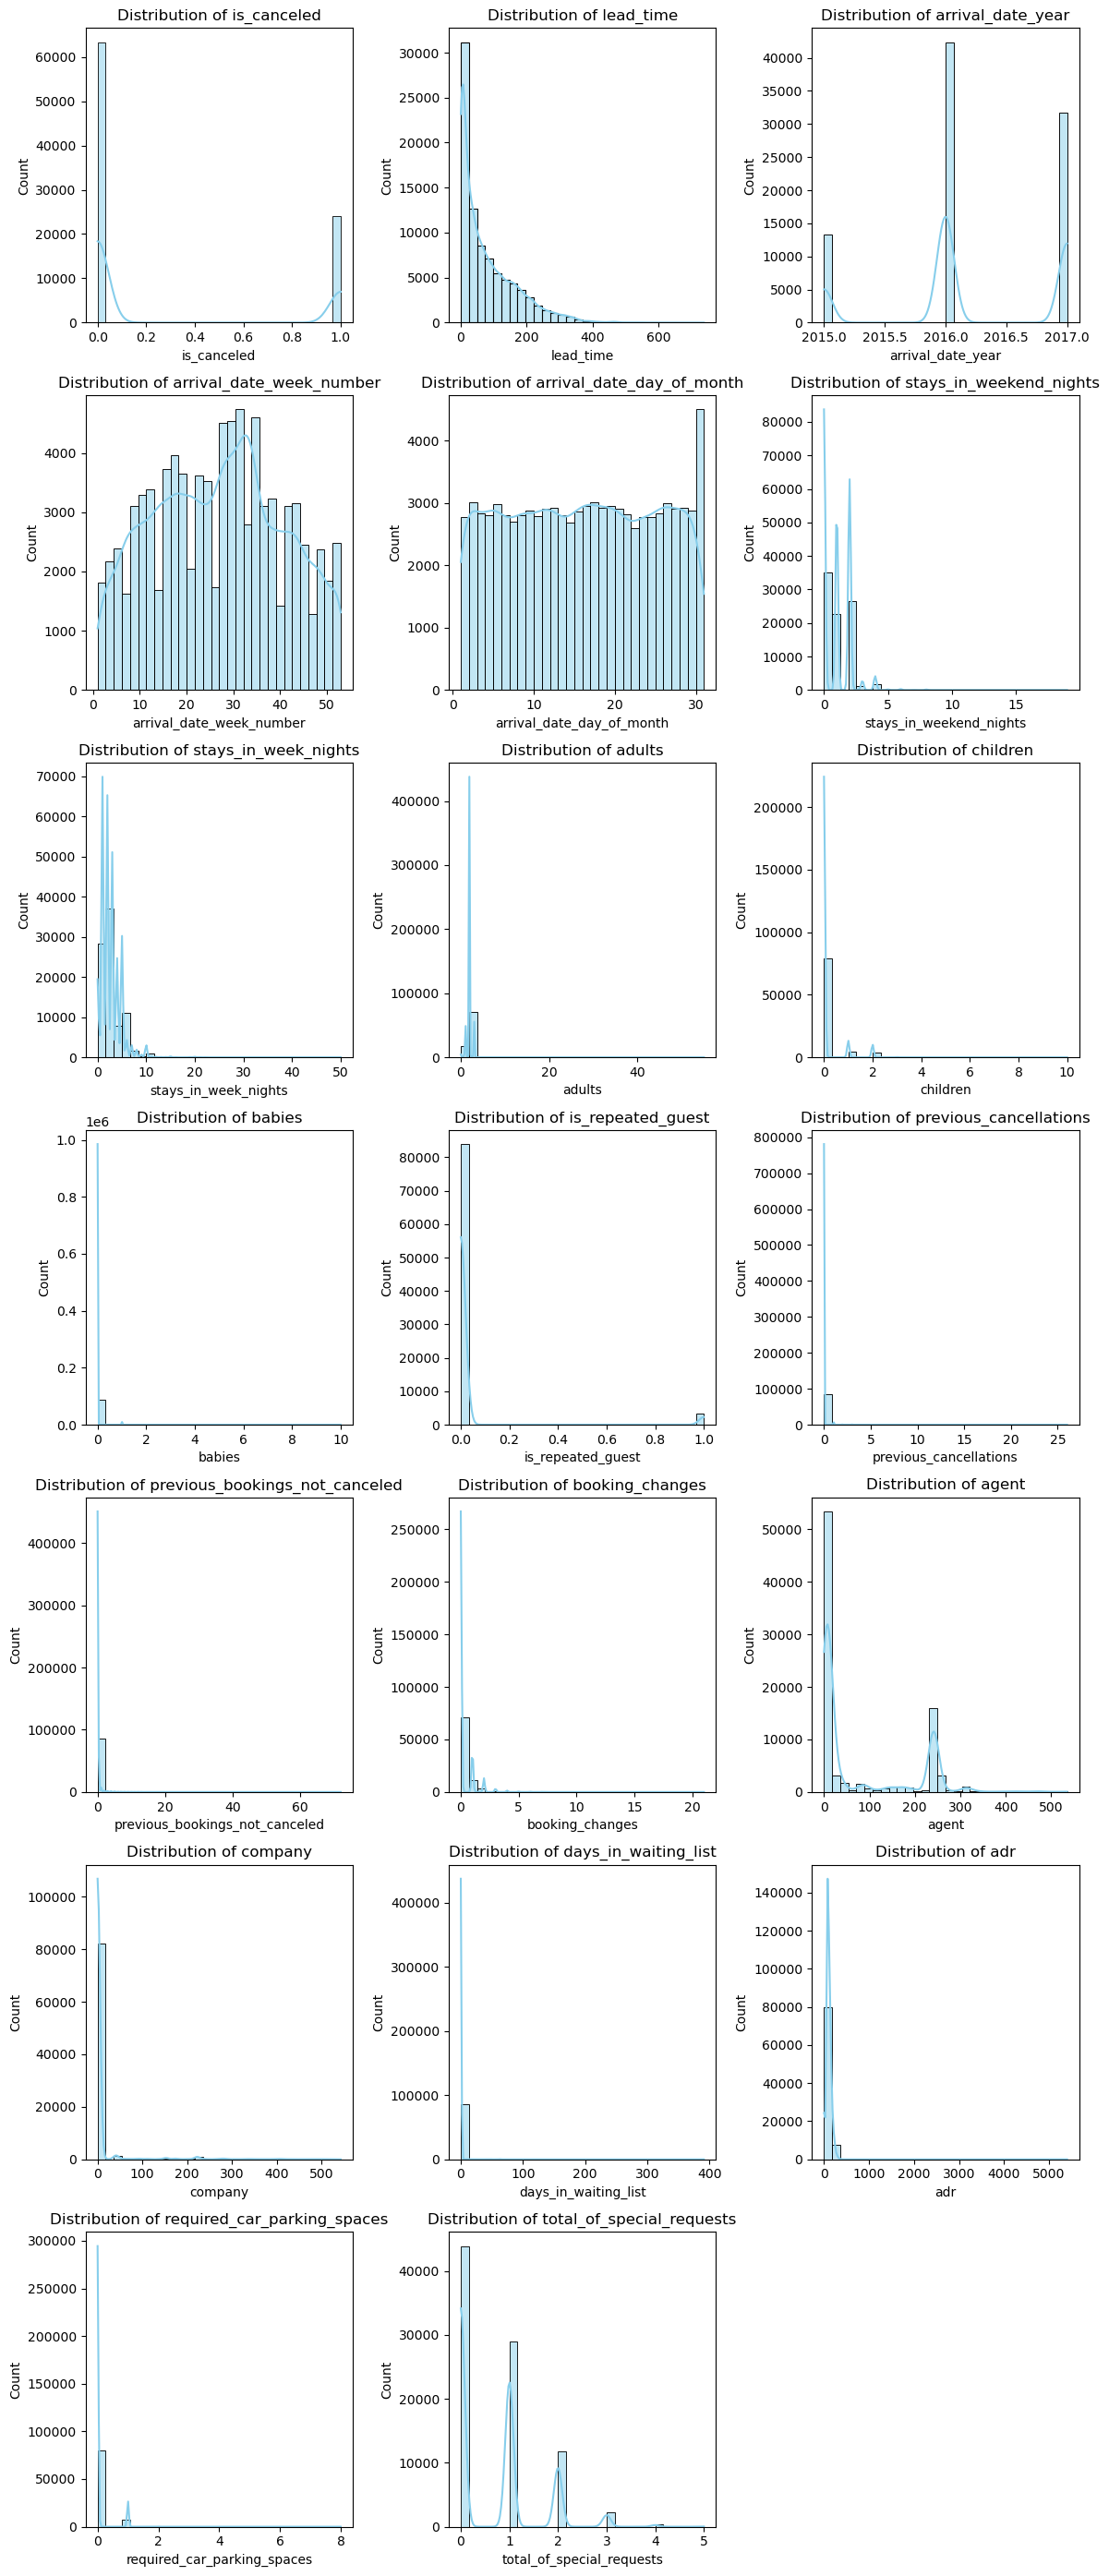

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# List of numerical columns
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns

# Calculate number of subplots (rows and columns)
num_columns = len(numerical_columns)
num_rows = int(np.ceil(num_columns / 3))  # For 3 columns per row

# Set up the matplotlib figure
plt.figure(figsize=(12, num_rows * 4))

# Plot histograms for numerical columns
for i, column in enumerate(numerical_columns, 1):
    plt.subplot(num_rows, 3, i)  # Dynamic number of rows and columns
    sns.histplot(df[column], kde=True, bins=30, color='skyblue')
    plt.title(f'Distribution of {column}')
    plt.tight_layout()

plt.show()


## Code Explanation
This cell executes: `# Select only numerical columns for correlation calculation`


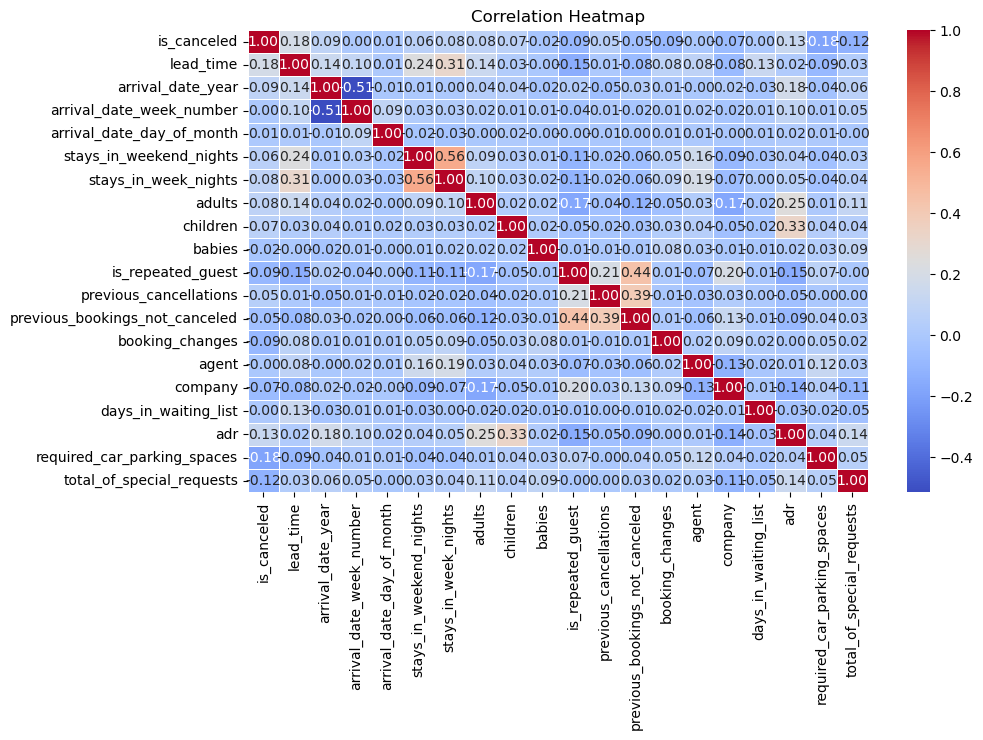

In [19]:
# Select only numerical columns for correlation calculation
numerical_columns = df.select_dtypes(include=['float64', 'int64'])

# Calculate the correlation matrix
correlation_matrix = numerical_columns.corr()

# Plot the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()


## Code Explanation
This cell executes: `# Hotel distribution`


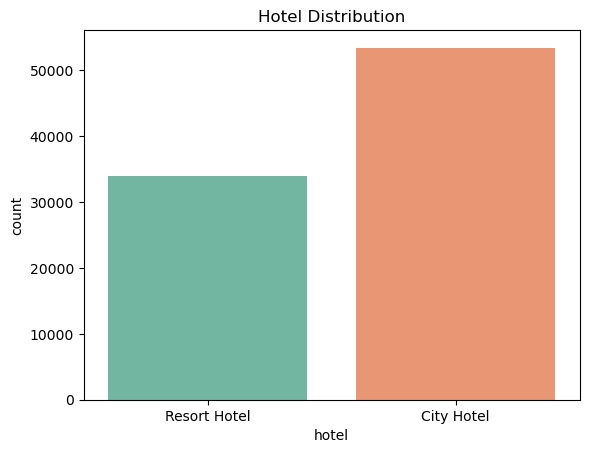

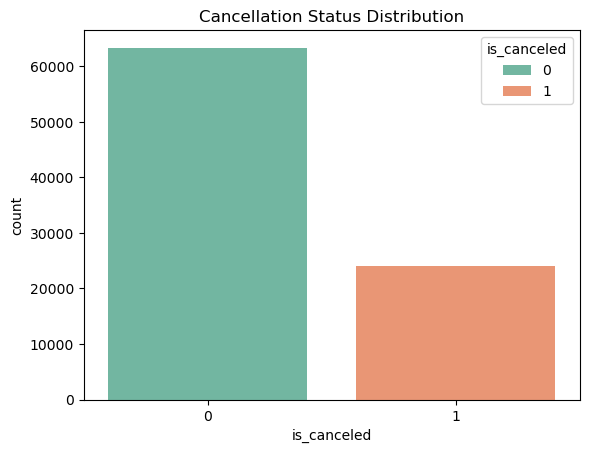

In [21]:
# Hotel distribution
sns.countplot(x='hotel', data=df, hue='hotel', palette='Set2')
plt.title('Hotel Distribution')
plt.show()

# Cancellation status distribution
sns.countplot(x='is_canceled', data=df, hue='is_canceled', palette='Set2')
plt.title('Cancellation Status Distribution')
plt.show()


## Code Explanation
This cell executes: `# Define numerical columns for boxplot`


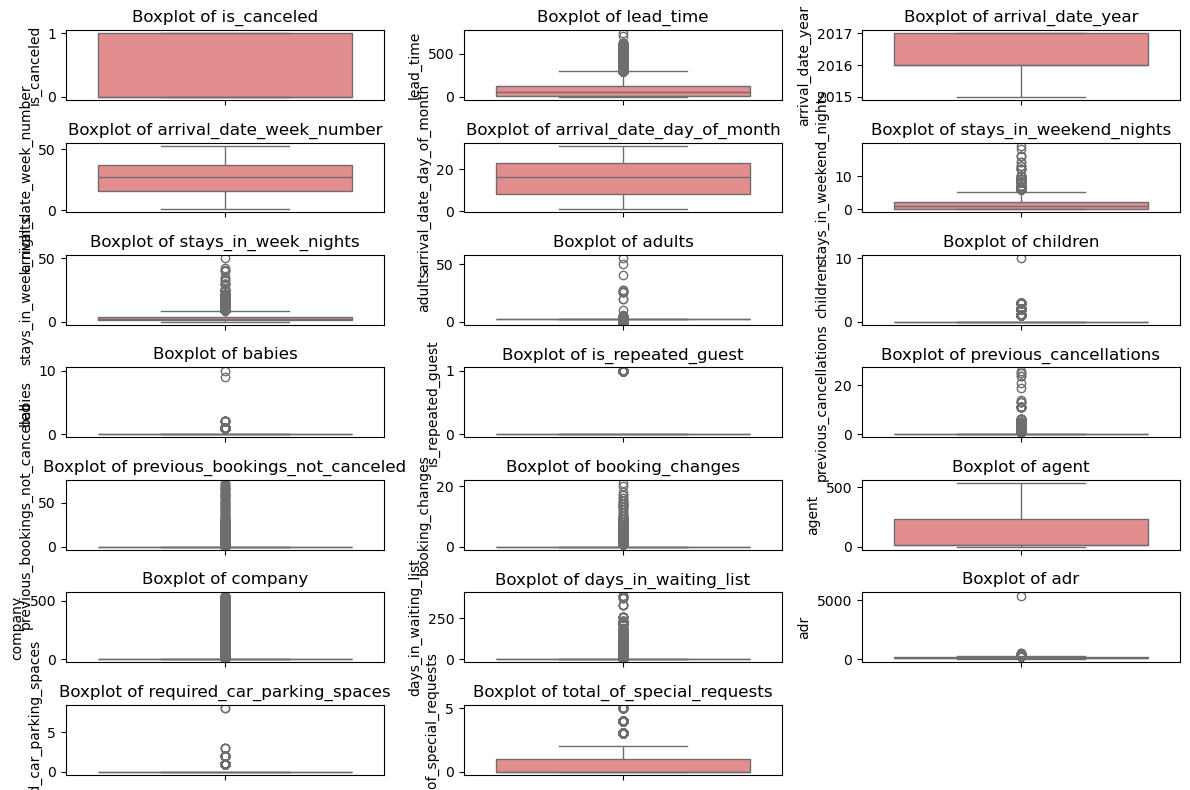

In [23]:
# Define numerical columns for boxplot
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns

# Adjust grid size to match number of numerical columns
rows = (len(numerical_columns) // 3) + (len(numerical_columns) % 3 > 0)  # Number of rows needed
cols = 3  # Keep columns as 3

# Create subplots
plt.figure(figsize=(12, 8))

for i, column in enumerate(numerical_columns, 1):
    plt.subplot(rows, cols, i)  # Automatically adjust based on number of columns
    sns.boxplot(data=df[column], color='lightcoral')
    plt.title(f'Boxplot of {column}')

plt.tight_layout()  # Adjust subplots to fit
plt.show()


## Code Explanation
This cell executes: `# Convert the 'reservation_status_date' column (or any other timestamp column) to datetime format`


In [24]:
# Convert the 'reservation_status_date' column (or any other timestamp column) to datetime format
df['reservation_status_date'] = pd.to_datetime(df['reservation_status_date'])

# Verify the conversion by checking the data type
print(df['reservation_status_date'].dtype)


datetime64[ns]


## Code Explanation
This cell executes: `# Extract year, month, and day of the week from the reservation_status_date`


In [25]:
# Extract year, month, and day of the week from the reservation_status_date
df['reservation_year'] = df['reservation_status_date'].dt.year
df['reservation_month'] = df['reservation_status_date'].dt.month
df['reservation_day_of_week'] = df['reservation_status_date'].dt.dayofweek  # 0 = Monday, 6 = Sunday

# Check the new columns
df[['reservation_status_date', 'reservation_year', 'reservation_month', 'reservation_day_of_week']].head()


,reservation_status_date,reservation_year,reservation_month,reservation_day_of_week
0,2015-07-01,2015,7,2
1,2015-07-01,2015,7,2
2,2015-07-02,2015,7,3
3,2015-07-02,2015,7,3
4,2015-07-03,2015,7,4


## Code Explanation
This cell executes: `# Count the number of bookings for each hotel type`


In [26]:
# Count the number of bookings for each hotel type
hotel_counts = df['hotel'].value_counts()
print(hotel_counts)


hotel
City Hotel      53428
Resort Hotel    33949
Name: count, dtype: int64


## Code Explanation
This cell executes: `# Count the number of bookings for each meal type`


In [27]:
# Count the number of bookings for each meal type
meal_counts = df['meal'].value_counts()
print(meal_counts)


meal
BB           67962
SC            9481
HB            9084
Undefined      490
FB             360
Name: count, dtype: int64


## Code Explanation
This cell executes: `# Count the number of bookings for each country`


In [28]:
# Count the number of bookings for each country
country_counts = df['country'].value_counts().head(10)  # Display top 10 countries
print(country_counts)


country
PRT    27886
GBR    10433
FRA     8837
ESP     7252
DEU     5387
ITA     3066
IRL     3016
BEL     2081
BRA     1995
NLD     1911
Name: count, dtype: int64


## Code Explanation
This cell executes: `# Aggregate by year and month to see booking counts per month`


In [29]:
# Aggregate by year and month to see booking counts per month
monthly_counts = df.groupby(['reservation_year', 'reservation_month']).size()
print(monthly_counts)


reservation_year  reservation_month
2014              10                     11
                  11                      1
2015              1                      76
                  2                      25
                  3                      39
                  4                      89
                  5                     161
                  6                     329
                  7                    1423
                  8                    2242
                  9                    2690
                  10                   2793
                  11                   1883
                  12                   1796
2016              1                    2693
                  2                    3321
                  3                    4140
                  4                    3865
                  5                    3827
                  6                    3557
                  7                    3865
                  8                    3

## Code Explanation
This cell executes: `# Calculate average ADR by hotel type`


In [30]:
# Calculate average ADR by hotel type
adr_by_hotel = df.groupby('hotel')['adr'].mean()
print(adr_by_hotel)


hotel
City Hotel      110.985944
Resort Hotel     99.044815
Name: adr, dtype: float64


## Code Explanation
This cell executes: `# Pivot table to show the average ADR by hotel and month`


In [31]:
# Pivot table to show the average ADR by hotel and month
adr_pivot = df.pivot_table(index=['hotel', 'reservation_month'], values='adr', aggfunc='mean')
print(adr_pivot)


                                       adr
hotel        reservation_month            
City Hotel   1                   94.962027
             2                   98.414578
             3                  100.700799
             4                  118.002002
             5                  127.078363
             6                  121.584231
             7                  121.113003
             8                  122.074545
             9                  117.080850
             10                 105.932224
             11                  92.618742
             12                  91.056984
Resort Hotel 1                   68.774383
             2                   66.194888
             3                   72.998632
             4                   88.751607
             5                   92.317647
             6                  120.875239
             7                  148.952197
             8                  179.478348
             9                  108.568475
           

## Code Explanation
This cell executes: `# Melting the dataframe to have hotel and meal as variables`


In [32]:
# Melting the dataframe to have hotel and meal as variables
melted_df = df.melt(id_vars=['hotel', 'meal'], value_vars=['adr', 'lead_time'], var_name='Variable', value_name='Value')
print(melted_df.head())


          hotel meal Variable  Value
0  Resort Hotel   BB      adr    0.0
1  Resort Hotel   BB      adr    0.0
2  Resort Hotel   BB      adr   75.0
3  Resort Hotel   BB      adr   75.0
4  Resort Hotel   BB      adr   98.0


## Code Explanation
This cell executes: `# Filter data for reservations made in 2016`


In [33]:
# Filter data for reservations made in 2016
df_2016 = df[df['reservation_year'] == 2016]
print(df_2016.head())


             hotel  is_canceled  lead_time  arrival_date_year  \
3446  Resort Hotel            0        183               2015   
3469  Resort Hotel            0         49               2015   
3564  Resort Hotel            0         65               2015   
3582  Resort Hotel            0         57               2015   
3614  Resort Hotel            0        112               2015   

     arrival_date_month  arrival_date_week_number  arrival_date_day_of_month  \
3446           December                        50                          8   
3469           December                        51                         17   
3564           December                        52                         23   
3582           December                        52                         24   
3614           December                        52                         26   

      stays_in_weekend_nights  stays_in_week_nights  adults  ...  \
3446                        8                    20       2 

## Code Explanation
This cell executes: `# Convert categorical column 'meal' into numeric values using encoding`


In [34]:
# Convert categorical column 'meal' into numeric values using encoding
df['meal_encoded'] = df['meal'].map({'BB': 0, 'HB': 1, 'FB': 2, 'SC': 3})
print(df[['meal', 'meal_encoded']].head())


  meal  meal_encoded
0   BB           0.0
1   BB           0.0
2   BB           0.0
3   BB           0.0
4   BB           0.0


## Code Explanation
This cell executes: `# Create a new feature for total nights stayed`


In [35]:
# Create a new feature for total nights stayed
df['total_nights'] = df['stays_in_weekend_nights'] + df['stays_in_week_nights']
print(df[['stays_in_weekend_nights', 'stays_in_week_nights', 'total_nights']].head())


   stays_in_weekend_nights  stays_in_week_nights  total_nights
0                        0                     0             0
1                        0                     0             0
2                        0                     1             1
3                        0                     1             1
4                        0                     2             2


## Code Explanation
This cell executes: `# Check for missing values after reshaping`


In [36]:
# Check for missing values after reshaping
print(df.isnull().sum())


hotel                               0
is_canceled                         0
lead_time                           0
arrival_date_year                   0
arrival_date_month                  0
arrival_date_week_number            0
arrival_date_day_of_month           0
stays_in_weekend_nights             0
stays_in_week_nights                0
adults                              0
children                            0
babies                              0
meal                                0
country                             0
market_segment                      0
distribution_channel                0
is_repeated_guest                   0
previous_cancellations              0
previous_bookings_not_canceled      0
reserved_room_type                  0
assigned_room_type                  0
booking_changes                     0
deposit_type                        0
agent                               0
company                             0
days_in_waiting_list                0
customer_typ

### Checking for Missing Values
This code checks for missing values in each column to determine where data cleaning is needed.

## Code Explanation
This cell executes: `df['meal_encoded'] = df['meal_encoded'].fillna(df['meal_encoded'].mode()[0])`


In [38]:
df['meal_encoded'] = df['meal_encoded'].fillna(df['meal_encoded'].mode()[0])


## Code Explanation
This cell executes: `import matplotlib.pyplot as plt`


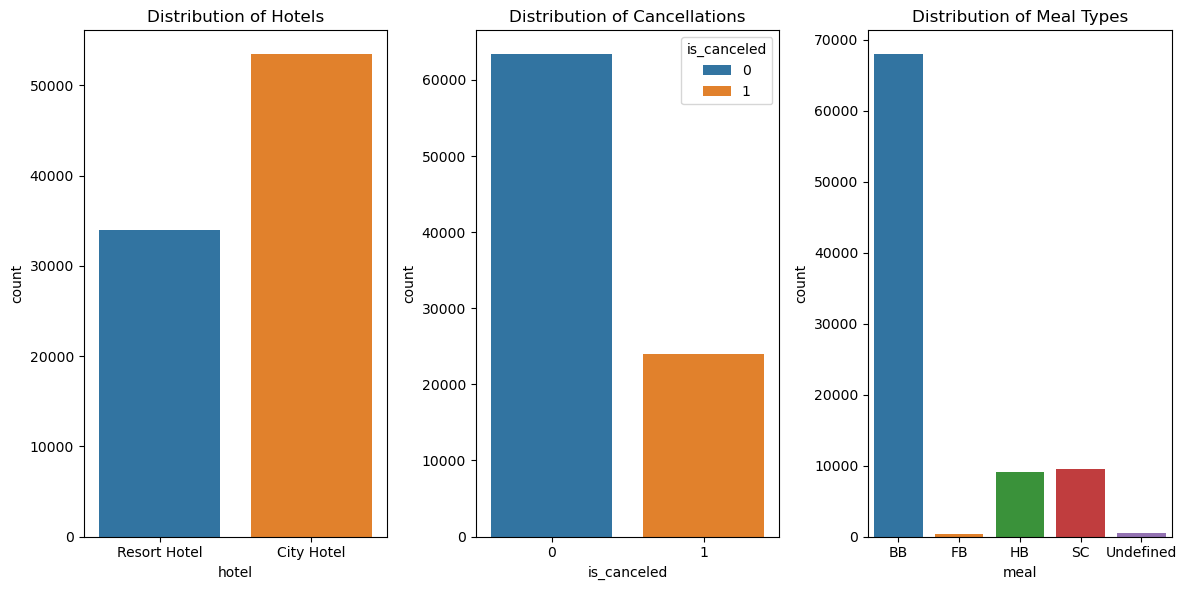

In [41]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set up the size of the plots
plt.figure(figsize=(12, 6))

# Plot distribution of 'hotel'
plt.subplot(1, 3, 1)
sns.countplot(x='hotel', data=df, hue='hotel')
plt.title('Distribution of Hotels')

# Plot distribution of 'is_canceled'
plt.subplot(1, 3, 2)
sns.countplot(x='is_canceled', data=df, hue='is_canceled')
plt.title('Distribution of Cancellations')

# Plot distribution of 'meal'
plt.subplot(1, 3, 3)
sns.countplot(x='meal', data=df, hue='meal')
plt.title('Distribution of Meal Types')

# Adjust layout for better visualization
plt.tight_layout()
plt.show()


## Code Explanation
This cell executes: `# Resample data by month (using 'ME' for month-end)`


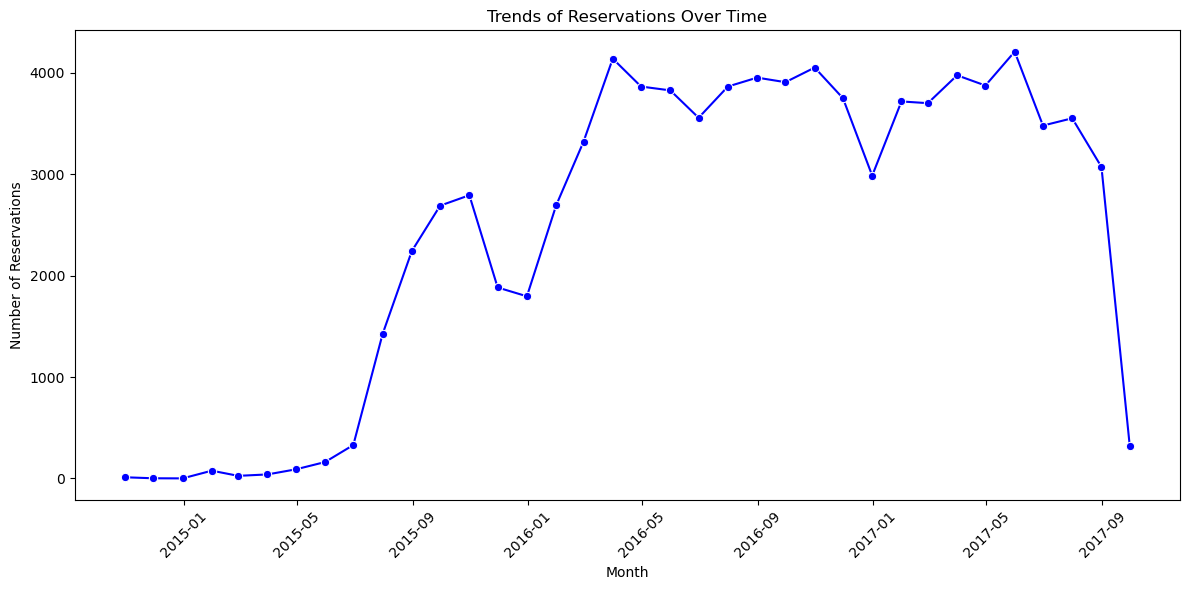

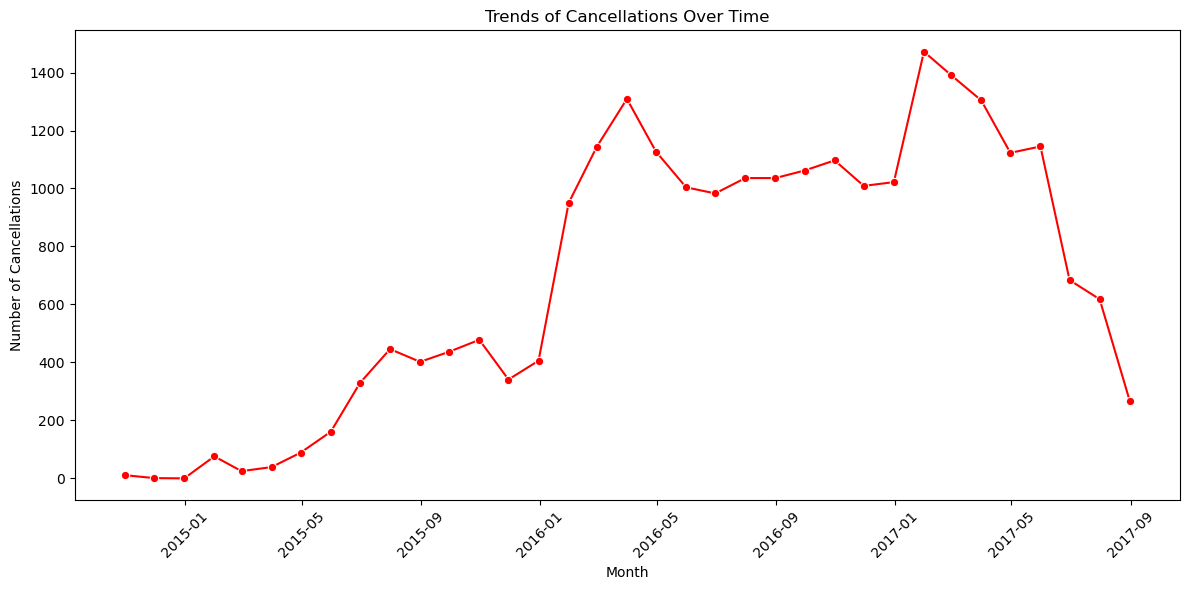

In [43]:
# Resample data by month (using 'ME' for month-end)
monthly_reservations = df.resample('ME').size()

# Plot the number of reservations per month
plt.figure(figsize=(12, 6))
sns.lineplot(data=monthly_reservations, marker='o', color='blue')
plt.title('Trends of Reservations Over Time')
plt.xlabel('Month')
plt.ylabel('Number of Reservations')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Optional: For cancellations over time (using 'ME' for month-end)
monthly_cancellations = df[df['is_canceled'] == 1].resample('ME').size()

# Plot the number of cancellations per month
plt.figure(figsize=(12, 6))
sns.lineplot(data=monthly_cancellations, marker='o', color='red')
plt.title('Trends of Cancellations Over Time')
plt.xlabel('Month')
plt.ylabel('Number of Cancellations')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


## Code Explanation
This cell executes: `from sklearn.cluster import KMeans`


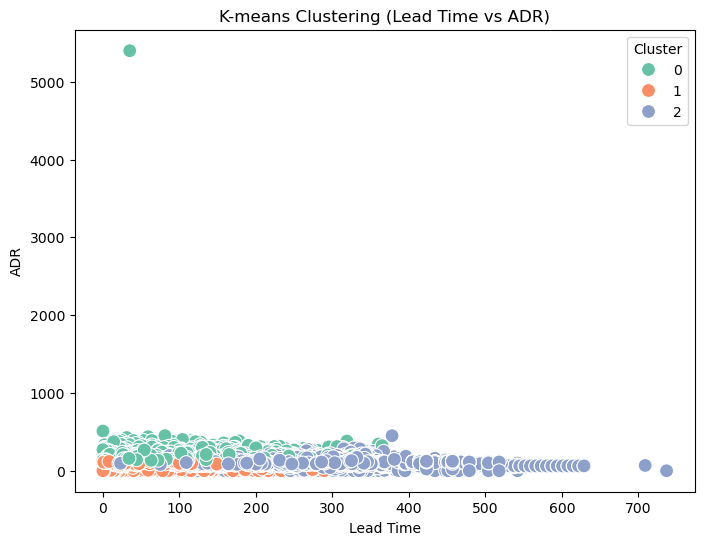

In [44]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Prepare your features (select relevant features)
features = df[['lead_time', 'adr', 'stays_in_weekend_nights', 'stays_in_week_nights']]

# Step 2: Handle missing values if any
features = features.dropna()

# Step 3: Scale the features (K-means is sensitive to scale)
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Step 4: Apply K-means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
df['cluster'] = kmeans.fit_predict(scaled_features)

# Step 5: Visualize the clusters (example using a scatter plot of two features)
plt.figure(figsize=(8, 6))
sns.scatterplot(x='lead_time', y='adr', hue='cluster', data=df, palette='Set2', s=100)
plt.title('K-means Clustering (Lead Time vs ADR)')
plt.xlabel('Lead Time')
plt.ylabel('ADR')
plt.legend(title='Cluster')
plt.show()


## Code Explanation
This cell executes: `# Inspect the K-means centroids`


In [46]:
# Inspect the K-means centroids
print(kmeans.cluster_centers_)


[[-0.22263627  1.159789   -0.09681545 -0.13908413]
 [-0.44629628 -0.49927837 -0.3987616  -0.42117051]
 [ 1.10660113 -0.16799668  0.88683916  0.97342874]]


## Code Explanation
This cell executes: `# Selecting only 'lead_time' and 'adr' for clustering`


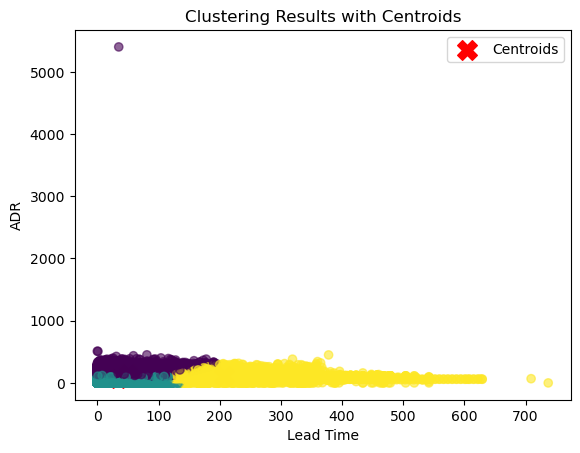

In [48]:
# Selecting only 'lead_time' and 'adr' for clustering
df_for_clustering = df[['lead_time', 'adr']]

# Apply K-means clustering
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(df_for_clustering)

# Assign the cluster labels to the DataFrame
df['cluster'] = kmeans.labels_

# Plot the clusters with centroids
centroids = kmeans.cluster_centers_

# Step 2: Plot the centroids (cluster centers)
centroid_df = pd.DataFrame(centroids, columns=['lead_time', 'adr'])

# Plot centroids as red 'X' markers
plt.scatter(centroid_df['lead_time'], centroid_df['adr'], s=200, c='red', marker='X', label='Centroids')

# Plot data points with the clusters
plt.scatter(df['lead_time'], df['adr'], c=kmeans.labels_, cmap='viridis', alpha=0.6)

# Add labels and title
plt.xlabel('Lead Time')
plt.ylabel('ADR')
plt.title('Clustering Results with Centroids')
plt.legend()
plt.show()


## Code Explanation
This cell executes: `# Check the column names in your DataFrame`


In [50]:
# Check the column names in your DataFrame
print(df.columns)


Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_year', 'reservation_month',
       'reservation_day_of_week', 'meal_encoded', 'total_nights', 'cluster'],
      dtype='object')


## Code Explanation
This cell executes: `# Group by year and month to count reservations`


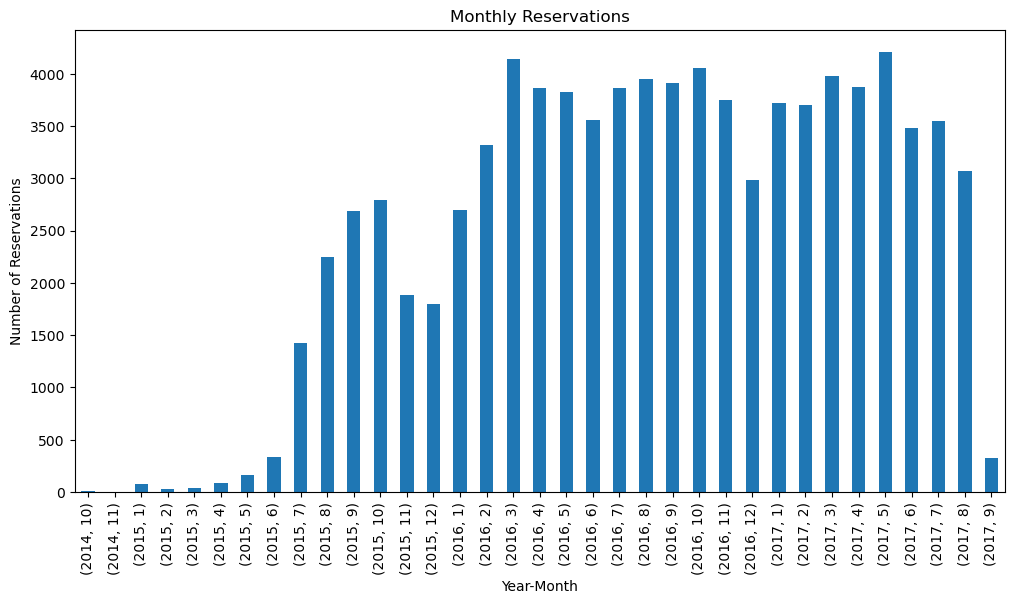

In [51]:
# Group by year and month to count reservations
monthly_reservations = df.groupby(['reservation_year', 'reservation_month']).size()

# Plot the monthly reservations
import matplotlib.pyplot as plt
monthly_reservations.plot(kind='bar', figsize=(12, 6))
plt.title('Monthly Reservations')
plt.xlabel('Year-Month')
plt.ylabel('Number of Reservations')
plt.show()


## Code Explanation
This cell executes: `print(df[['reservation_year', 'reservation_month', 'arrival_date_day_of_month']].head())`


In [56]:
print(df[['reservation_year', 'reservation_month', 'arrival_date_day_of_month']].head())


                         reservation_year  reservation_month  \
reservation_status_date                                        
2015-07-01                           2015                  7   
2015-07-01                           2015                  7   
2015-07-02                           2015                  7   
2015-07-02                           2015                  7   
2015-07-03                           2015                  7   

                         arrival_date_day_of_month  
reservation_status_date                             
2015-07-01                                       1  
2015-07-01                                       1  
2015-07-02                                       1  
2015-07-02                                       1  
2015-07-03                                       1  


## Code Explanation
This cell executes: `# Group by 'reservation_status_date' and count the number of reservations`


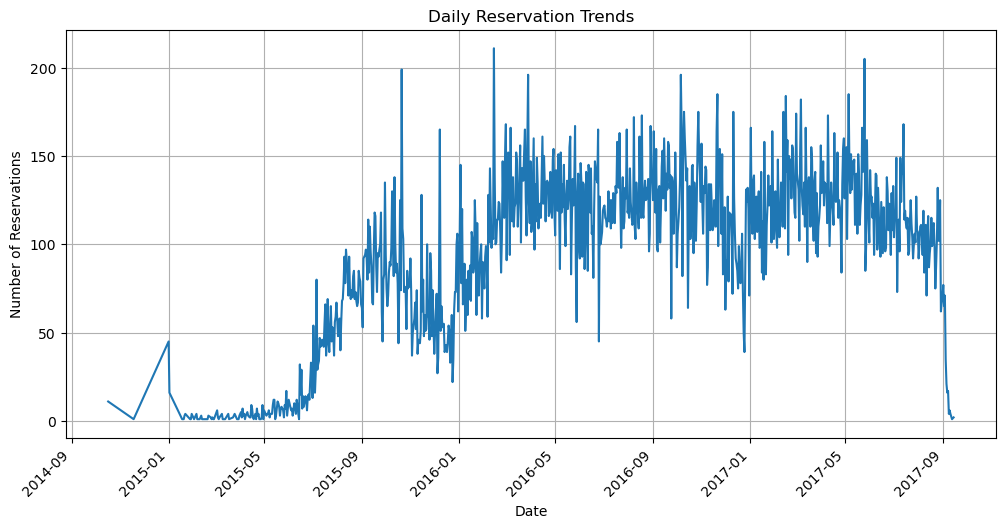

In [58]:
# Group by 'reservation_status_date' and count the number of reservations
daily_reservations = df.groupby('reservation_status_date').size()

# Plot the daily reservations
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
daily_reservations.plot()
plt.title('Daily Reservation Trends')
plt.xlabel('Date')
plt.ylabel('Number of Reservations')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


## Code Explanation
This cell executes: `# Ensure 'reservation_status_date' is in datetime format`


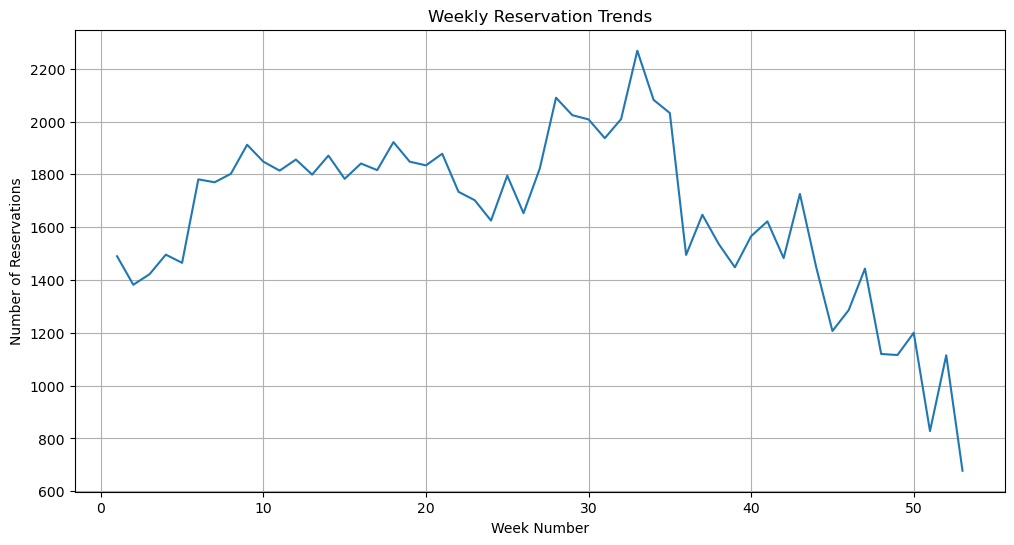

In [59]:
# Ensure 'reservation_status_date' is in datetime format
df['reservation_status_date'] = pd.to_datetime(df['reservation_status_date'])

# Group by year and week number, then count the number of reservations
weekly_reservations = df.groupby(df['reservation_status_date'].dt.isocalendar().week).size()

# Plot the weekly reservations
plt.figure(figsize=(12, 6))
weekly_reservations.plot()
plt.title('Weekly Reservation Trends')
plt.xlabel('Week Number')
plt.ylabel('Number of Reservations')
plt.grid(True)
plt.show()


## Code Explanation
This cell executes: `# Group by year and month, then count the number of reservations`


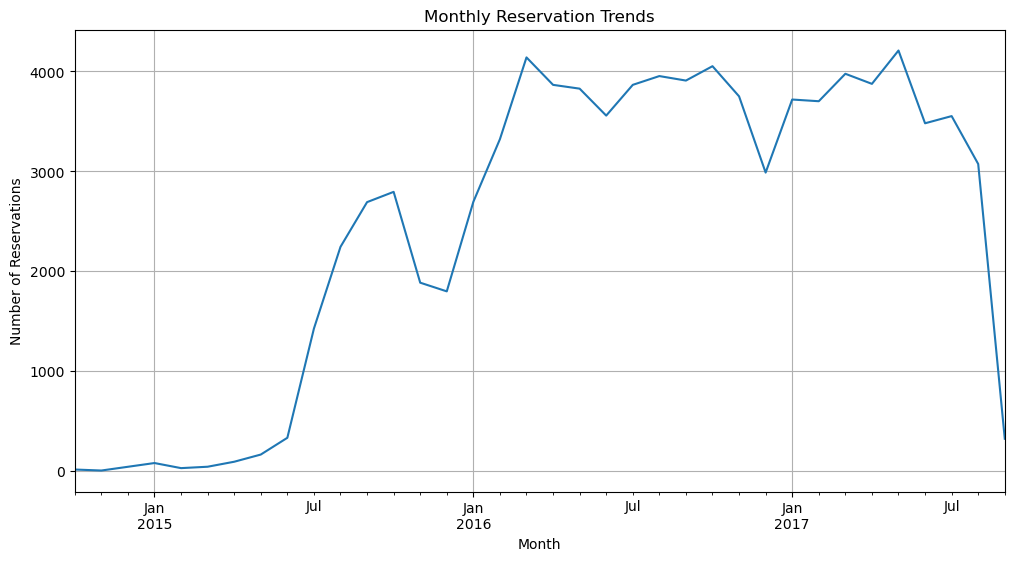

In [60]:
# Group by year and month, then count the number of reservations
monthly_reservations = df.groupby(df['reservation_status_date'].dt.to_period('M')).size()

# Plot the monthly reservations
plt.figure(figsize=(12, 6))
monthly_reservations.plot()
plt.title('Monthly Reservation Trends')
plt.xlabel('Month')
plt.ylabel('Number of Reservations')
plt.grid(True)
plt.show()


## Code Explanation
This cell executes: `# Ensure 'reservation_status_date' is the datetime type`


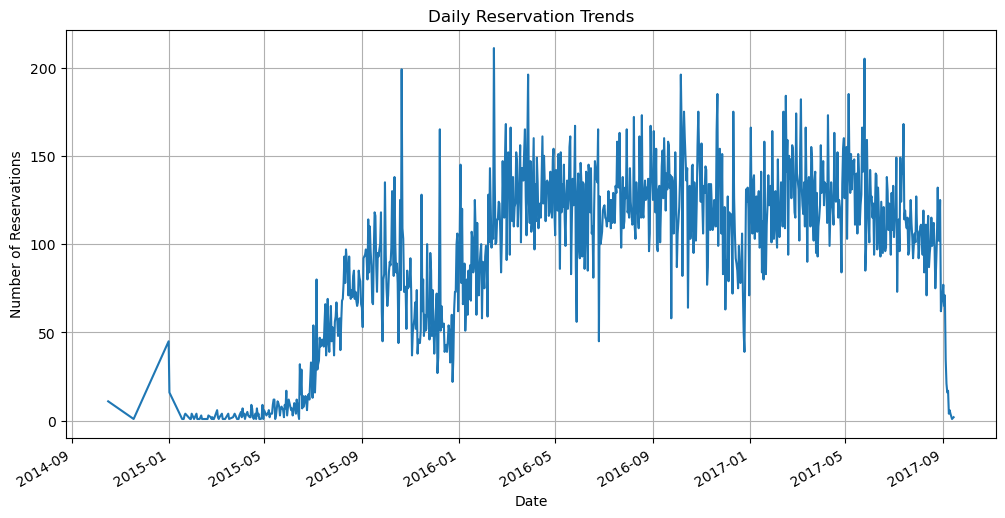

In [61]:
# Ensure 'reservation_status_date' is the datetime type
df['reservation_status_date'] = pd.to_datetime(df['reservation_status_date'])

# Group by date and count reservations
daily_reservations = df.groupby('reservation_status_date').size()

# Plot the daily reservations to identify trends and seasonality
plt.figure(figsize=(12, 6))
daily_reservations.plot()
plt.title('Daily Reservation Trends')
plt.xlabel('Date')
plt.ylabel('Number of Reservations')
plt.grid(True)
plt.show()


## Code Explanation
This cell executes: `from statsmodels.tsa.seasonal import seasonal_decompose`


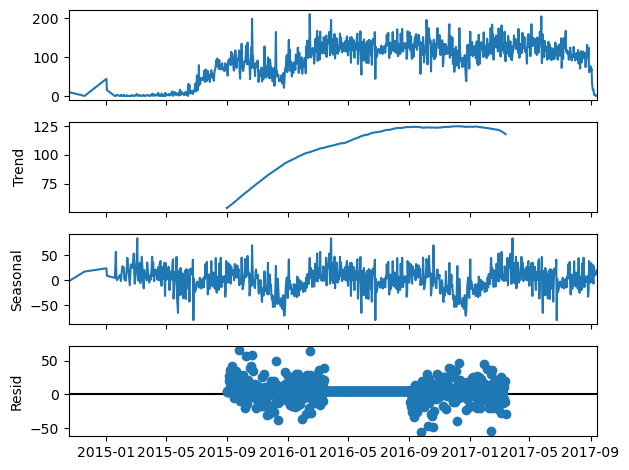

In [62]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Perform seasonal decomposition (using daily data)
decomposition = seasonal_decompose(daily_reservations, model='additive', period=365)  # 'period=365' for yearly seasonality

# Plot the decomposition
decomposition.plot()
plt.show()


## Code Explanation
This cell executes: `import plotly.express as px`


In [63]:
import plotly.express as px

# Create the daily reservation count
daily_reservations = df.groupby('reservation_status_date').size().reset_index(name='reservations')

# Create an interactive plot
fig = px.line(daily_reservations, 
              x='reservation_status_date', 
              y='reservations', 
              title='Interactive Daily Reservation Trends',
              labels={'reservation_status_date': 'Date', 'reservations': 'Number of Reservations'})

# Show the plot
fig.show()


## Code Explanation
This cell executes: `from statsmodels.tsa.seasonal import seasonal_decompose`


In [64]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Perform seasonal decomposition
decomposition = seasonal_decompose(daily_reservations['reservations'], model='additive', period=365)

# Extract the decomposed components
trend = decomposition.trend.dropna()
seasonal = decomposition.seasonal.dropna()
residual = decomposition.resid.dropna()

# Create the interactive plots
fig_trend = px.line(trend, title='Interactive Trend Component')
fig_seasonal = px.line(seasonal, title='Interactive Seasonal Component')
fig_residual = px.line(residual, title='Interactive Residual Component')

# Show the plots
fig_trend.show()
fig_seasonal.show()
fig_residual.show()


## Code Explanation
This cell executes: `import plotly.express as px`


In [65]:
import plotly.express as px

# Create a new column for 'day_of_week' (0=Monday, 1=Tuesday, ..., 6=Sunday)
df['day_of_week'] = df['reservation_status_date'].dt.dayofweek

# Create a new column for 'month'
df['month'] = df['reservation_status_date'].dt.month

# Group by month and day_of_week to count reservations
heatmap_data = df.groupby(['month', 'day_of_week']).size().reset_index(name='reservations')

# Create the heatmap
fig = px.density_heatmap(heatmap_data, 
                         x='month', 
                         y='day_of_week', 
                         z='reservations', 
                         title='Interactive Heatmap of Reservations by Month and Day of the Week',
                         labels={'month': 'Month', 'day_of_week': 'Day of Week', 'reservations': 'Number of Reservations'},
                         color_continuous_scale='Viridis')

# Show the heatmap
fig.show()


## Code Explanation
This cell executes: `import dash`


In [68]:
import dash
import dash_core_components as dcc
import dash_html_components as html
import plotly.express as px
import pandas as pd

# Assuming the dataset is loaded into df

# Example preprocessing:
# Grouping by reservation date to get the total number of reservations per date
daily_reservations = df.groupby('reservation_status_date').size().reset_index(name='reservations')

# Grouping by reservation status to get the count of each status
status_dist = df['reservation_status'].value_counts().reset_index(name='count').rename(columns={'index': 'reservation_status'})

# Monthly reservation trends
df['month'] = df['reservation_status_date'].dt.month
monthly_reservations = df.groupby('month').size().reset_index(name='reservations')

# Day-of-week reservation trends
df['day_of_week'] = df['reservation_status_date'].dt.dayofweek
day_of_week_reservations = df.groupby('day_of_week').size().reset_index(name='reservations')

# Heatmap data (Reservations by Month and Day of Week)
heatmap_data = df.groupby(['month', 'day_of_week']).size().reset_index(name='reservations')

# Initialize the Dash app
app = dash.Dash(__name__)

# Layout of the dashboard
app.layout = html.Div(children=[
    html.H1(children="Hotel Reservations Dashboard"),
    
    # Time Series Plot (Total Reservations Over Time)
    dcc.Graph(
        id='time_series_plot',
        figure=px.line(daily_reservations, 
                       x='reservation_status_date', 
                       y='reservations', 
                       title='Total Reservations Over Time').update_layout(title_x=0.5)
    ),
    
    # Pie Chart (Reservation Status Distribution)
    dcc.Graph(
        id='reservation_status_pie',
        figure=px.pie(status_dist, 
                      names='reservation_status', 
                      values='count', 
                      title='Reservation Status Distribution').update_layout(title_x=0.5)
    ),
    
    # Monthly Reservation Trends (Bar Chart)
    dcc.Graph(
        id='monthly_reservation_bar',
        figure=px.bar(monthly_reservations, 
                      x='month', 
                      y='reservations', 
                      title='Reservations Per Month').update_layout(title_x=0.5)
    ),
    
    # Day-of-Week Reservation Trends (Bar Chart)
    dcc.Graph(
        id='day_of_week_reservation_bar',
        figure=px.bar(day_of_week_reservations, 
                      x='day_of_week', 
                      y='reservations', 
                      title='Reservations Per Day of Week').update_layout(title_x=0.5)
    ),
    
    # Heatmap (Seasonality - Reservations by Month and Day of Week)
    dcc.Graph(
        id='heatmap',
        figure=px.density_heatmap(heatmap_data, 
                                  x='month', 
                                  y='day_of_week', 
                                  z='reservations', 
                                  color_continuous_scale='Viridis',
                                  title='Reservations by Month and Day of Week').update_layout(title_x=0.5)
    ),
])

# Run the app
if __name__ == '__main__':
    app.run_server(debug=True)


# Key Findings and Insights

After analyzing the hotel booking dataset, here are some key takeaways:

- **Booking Trends**: The majority of bookings occur in the summer months, peaking in July and August.
- **Cancellation Rates**: A significant proportion of bookings get canceled, especially for city hotels.
- **Lead Time Effect**: Longer lead times tend to correlate with higher cancellation rates.
- **Most Popular Hotel Type**: City hotels have a higher number of bookings compared to resort hotels.
- **Impact of Special Requests**: Guests with special requests tend to have lower cancellation rates.
- **Price Influence**: Average daily rates (ADR) tend to be higher during peak seasons, influencing customer booking behavior.

These insights can help hotels optimize pricing strategies, manage cancellations, and improve customer experience.
